<a href="https://colab.research.google.com/github/pauloesteban/Data-Science-with-Python/blob/master/DS_5_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

# Iris dataset

In [ ]:
iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

In [ ]:
print(iris.shape)
iris.head()

(150, 6)


,id,sepal_len,sepal_wd,petal_len,petal_wd,species
0,0,5.1,3.5,1.4,0.2,iris-setosa
1,1,4.9,3.0,1.4,0.2,iris-setosa
2,2,4.7,3.2,1.3,0.2,iris-setosa
3,3,4.6,3.1,1.5,0.2,iris-setosa
4,4,5.0,3.6,1.4,0.2,iris-setosa


In [ ]:
iris.drop('id', axis=1, inplace=True)
iris.head()

,sepal_len,sepal_wd,petal_len,petal_wd,species
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa


In [ ]:
# Summary
iris.describe()

,sepal_len,sepal_wd,petal_len,petal_wd
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Class distribution

In [ ]:
iris.groupby('species').size()

species
iris-setosa        50
iris-versicolor    50
iris-virginica     50
dtype: int64

In [ ]:
iris['species'].value_counts()

iris-virginica     50
iris-setosa        50
iris-versicolor    50
Name: species, dtype: int64

# Data visualization

## Univariate plot

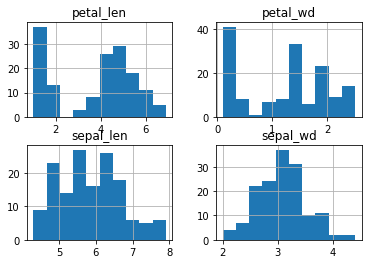

In [ ]:
iris.hist()
plt.show()

## Multivariate plot

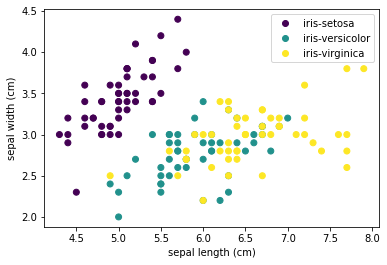

In [ ]:
# build a dict mapping species to an integer code
inv_name_dict = {'iris-setosa': 0, 
  'iris-versicolor': 1,
  'iris-virginica': 2}

# build integer color code 0/1/2
colors = [inv_name_dict[item] for item in iris['species']] 
# scatter plot
scatter = plt.scatter(iris['sepal_len'], iris['sepal_wd'], c = colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
## add legend
plt.legend(handles=scatter.legend_elements()[0],
  labels = inv_name_dict.keys())
plt.show()

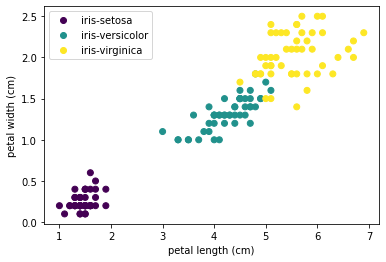

In [ ]:
# scatter plot
scatter = plt.scatter(iris['petal_len'], iris['petal_wd'],c = colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
# add legend
plt.legend(handles= scatter.legend_elements()[0],
  labels = inv_name_dict.keys())
plt.show()

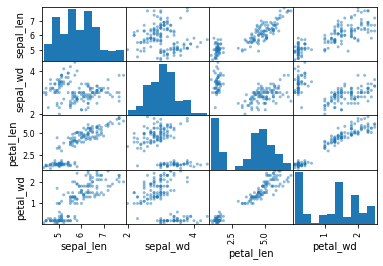

In [ ]:
pd.plotting.scatter_matrix(iris)
plt.show()

# Modeling

## Data preparation

In [ ]:
X = iris[['petal_len', 'petal_wd']]
y = iris['species']

Holdout method

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [ ]:
y_train.value_counts()
y_test.value_counts()

iris-virginica     15
iris-versicolor    15
iris-setosa        15
Name: species, dtype: int64

## knn

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Prediction

## Label prediction

In [ ]:
pred = knn.predict(X_test)

In [ ]:
pred[10:12]

array(['iris-setosa', 'iris-virginica'], dtype=object)

## Probability prediction

In [ ]:
y_pred_prob = knn.predict_proba(X_test)
y_pred_prob[10:12]

array([[1. , 0. , 0. ],
       [0. , 0.2, 0.8]])

# Model evaluation

## Accuracy

In [ ]:
(pred==y_test.values).sum()


44

In [ ]:
y_test.size

45

In [ ]:
(pred==y_test.values).sum()/y_test.size

0.9777777777777777

In [ ]:
knn.score(X_test, y_test)

0.9777777777777777

## Confusion matrix

In [ ]:
confusion_matrix(y_test, pred, labels=['iris-setosa','iris-versicolor','iris-virginica'])

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

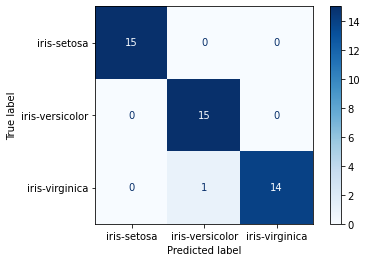

In [ ]:
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues);

## K-fold Cross Validation

Holdout method repeated k-times

In [ ]:
knn_cv = KNeighborsClassifier(n_neighbors=3)

cv = 5 or cv = 10 preferred

In [ ]:
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

In [ ]:
print(cv_scores)

[0.96666667 0.96666667 0.9        0.93333333 1.        ]


In [ ]:
cv_scores.mean()

0.9533333333333334

## Grid search

In [ ]:
knn2 = KNeighborsClassifier()

In [ ]:
param_grid = {'n_neighbors': np.arange(2, 10)}

In [ ]:
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

In [ ]:
knn_gscv.fit(X, y)
print(knn_gscv.best_params_)
print(knn_gscv.best_score_)

{'n_neighbors': 4}
0.9666666666666668


In [ ]:
knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X, y)

y_pred = knn_final.predict(X)
print(knn_final.score(X, y))

0.9733333333333334


# Label prediction with new data

In [ ]:
new_data = np.array([3.76, 1.20])

Reshape to 2-D

In [ ]:
new_data = new_data.reshape(1, -1)

In [ ]:
knn_final.predict(new_data)

array(['iris-versicolor'], dtype=object)

Alternative use 2-D list

In [ ]:
knn_final.predict([[3.76, 1.2]])

array(['iris-versicolor'], dtype=object)

## Probability Prediction with New Data

In [ ]:
new_data = np.array([[3.76, 1.2], [5.25, 1.2], [1.58, 1.2]])

In [ ]:
knn_final.predict(new_data)

array(['iris-versicolor', 'iris-virginica', 'iris-setosa'], dtype=object)

In [ ]:
knn_final.predict_proba(new_data)

array([[0.  , 1.  , 0.  ],
       [0.  , 0.25, 0.75],
       [1.  , 0.  , 0.  ]])

# Quiz

In [ ]:
y_true = np.array(['cat', 'dog', 'dog',
  'cat', 'fish', 'dog', 'fish'])
y_pred = np.array(['cat', 'cat', 'cat',
  'cat', 'fish', 'dog', 'fish'])

In [ ]:
confusion_matrix(y_true, y_pred,
  labels=['cat', 'dog', 'fish'])

array([[2, 0, 0],
       [2, 1, 0],
       [0, 0, 2]])